# Data description & Problem statement: 
The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam. I build a classifier using machine learning which will help in identifying whether a given SMS is a Spam or not.

# Workflow:
- Load the dataset
- Data cleaning (e.g. remove formats and punctuations)
- Basic data exploration
- Text vectorization, using "Bag of Words" technique
- Use "Latent Dirichlet Allocation" for document clustering (i.e. topic modeling)
- Determine, sort and print most important words/features for each topic

In [1]:
import sklearn
import numpy as np
import scipy as sc
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import preprocessing
%matplotlib inline

from scipy import stats

import warnings
warnings.filterwarnings("ignore")

# we insatll and import spacy package for some advanced tokenizaion techniques:
import spacy

# we also install and import mglearn package (using !pip install mglearn) for some interesting visualization of results:
import mglearn

In [2]:
ls

 Volume in drive C is OS
 Volume Serial Number is 3EA9-93A4

 Directory of C:\Users\rhash\Documents\Datasets\NLP projects (sklearn & Spark)

09/11/2018  10:03 AM    <DIR>          .
09/11/2018  10:03 AM    <DIR>          ..
09/11/2018  09:55 AM    <DIR>          .ipynb_checkpoints
09/10/2018  11:29 AM    <DIR>          aclImdb
09/10/2018  10:15 AM        84,125,825 aclImdb_v1.tar.gz
09/10/2018  11:57 AM    <DIR>          cache
09/11/2018  12:54 AM           149,226 IMDb review (positive vs negative reviews, in sklearn).ipynb
09/11/2018  10:02 AM             8,797 IMDb review (topic modeling, sklearn).ipynb
04/18/2011  02:53 PM             5,868 readme
09/11/2018  12:54 AM           196,814 sms filteration (ham vs spam, sklearn).ipynb
09/11/2018  10:03 AM            28,025 sms filteration (topic modeling, sklearn)-Copy1.ipynb
03/15/2011  10:36 PM           477,907 SMSSpamCollection
               7 File(s)     84,992,462 bytes
               5 Dir(s)  413,277,519,872 bytes free


# load and prepare the text data: 

In [3]:
messages = [line.rstrip() for line in open('SMSSpamCollection')]

In [4]:
#labels = [1 if m.split('\t')[0]=='ham' else 0 for m in messages]
#sms = [m.split('\t')[1] for m in messages]

In [5]:
messages = pd.read_csv('SMSSpamCollection', sep='\t', names=['labels', 'sms'])

In [6]:
messages.describe()

,labels,sms
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [7]:
messages.groupby('labels').describe()

sms                                                               
       count unique                                                top freq
labels                                                                     
ham     4825   4516                             Sorry, I'll call later   30
spam     747    653  Please call our customer service representativ...    4

In [8]:
messages['length']= messages['sms'].map(lambda x: len(x))

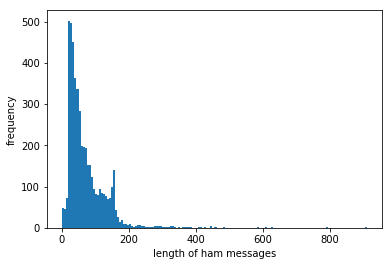

In [9]:
# histogram of length of ham messages:
plt.hist(messages[messages['labels']=='ham']['length'], bins=150)
plt.xlabel('length of ham messages')
plt.ylabel('frequency')
plt.show()

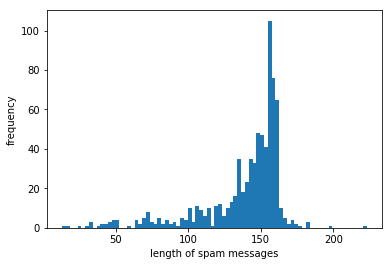

In [10]:
# histogram of length of spam messages:
plt.hist(messages[messages['labels']=='spam']['length'], bins=80)
plt.xlabel('length of spam messages')
plt.ylabel('frequency')
plt.show()

In [11]:
messages['labels'] = messages['labels'].map({'ham':1, 'spam':0})

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(max_features=500, stop_words="english",
                       ngram_range=(1, 1),
                       max_df=0.2)

X = vect.fit_transform(messages['sms'])

# document clustering with Latent Dirichlet Allocation:  LDA

In [23]:
from sklearn.decomposition import LatentDirichletAllocation 
lda = LatentDirichletAllocation(n_topics=3, learning_method="batch",                                
                                max_iter=32, random_state=42)

# We build the model and transform the data in one step  
document_topics = lda.fit_transform(X)

In [24]:
# For each topic (a row in the components_), sort the features (ascending) 
sorting = np.argsort(lda.components_, axis=1)[:, ::-1] 

# Get the feature names from the vectorizer 
feature_names = np.array(vect.get_feature_names())

In [25]:
# Print out the 10 topics: 
mglearn.tools.print_topics(topics=range(3), feature_names=feature_names,   
                           sorting=sorting, topics_per_chunk=5, n_words=10)

topic 0       topic 1       topic 2       
--------      --------      --------      
ok            free          gt            
got           ur            lt            
good          txt           ll            
come          stop          know          
love          text          just          
ur            send          want          
home          reply         sorry         
lor           mobile        hi            
da            phone         dont          
like          claim         later         


